## 1.1 Use the available data for 2021 for Angola, to predict the number of New_cases for November 20, 2021 and November 21, 2021 for Angola.

In [13]:
# importing Libraries to be used
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings("ignore")

In [14]:
# reading dataset
data = pd.read_csv('WHO-COVID-19-global-data.csv')
data   

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
162814,2021-11-15,ZW,Zimbabwe,AFRO,10,133438,1,4697
162815,2021-11-16,ZW,Zimbabwe,AFRO,33,133471,0,4697
162816,2021-11-17,ZW,Zimbabwe,AFRO,34,133505,1,4698
162817,2021-11-18,ZW,Zimbabwe,AFRO,52,133557,1,4699


In [15]:
# checking missing values
data.isnull().sum()

Date_reported          0
Country_code         687
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [21]:
# Country_code dropped because it has missing values
data=data.drop('Country_code',axis =1)
data          

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
162814,2021-11-15,Zimbabwe,AFRO,10,133438,1,4697
162815,2021-11-16,Zimbabwe,AFRO,33,133471,0,4697
162816,2021-11-17,Zimbabwe,AFRO,34,133505,1,4698
162817,2021-11-18,Zimbabwe,AFRO,52,133557,1,4699


In [22]:
# To change Date_reported column in datetime format by splitting year,month and days
data['Year'] = pd.to_datetime(data['Date_reported']).dt.year
data['Month'] = pd.to_datetime(data['Date_reported']).dt.month
data['Day'] = pd.to_datetime(data['Date_reported']).dt.day
data

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
0,2020-01-03,Afghanistan,EMRO,0,0,0,0,2020,1,3
1,2020-01-04,Afghanistan,EMRO,0,0,0,0,2020,1,4
2,2020-01-05,Afghanistan,EMRO,0,0,0,0,2020,1,5
3,2020-01-06,Afghanistan,EMRO,0,0,0,0,2020,1,6
4,2020-01-07,Afghanistan,EMRO,0,0,0,0,2020,1,7
...,...,...,...,...,...,...,...,...,...,...
162814,2021-11-15,Zimbabwe,AFRO,10,133438,1,4697,2021,11,15
162815,2021-11-16,Zimbabwe,AFRO,33,133471,0,4697,2021,11,16
162816,2021-11-17,Zimbabwe,AFRO,34,133505,1,4698,2021,11,17
162817,2021-11-18,Zimbabwe,AFRO,52,133557,1,4699,2021,11,18


In [24]:
# Extracting Angola from other country to be used in prediction
Angola = data[data['Country']=='Angola']
Angola

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
3435,2020-01-03,Angola,AFRO,0,0,0,0,2020,1,3
3436,2020-01-04,Angola,AFRO,0,0,0,0,2020,1,4
3437,2020-01-05,Angola,AFRO,0,0,0,0,2020,1,5
3438,2020-01-06,Angola,AFRO,0,0,0,0,2020,1,6
3439,2020-01-07,Angola,AFRO,0,0,0,0,2020,1,7
...,...,...,...,...,...,...,...,...,...,...
4117,2021-11-15,Angola,AFRO,14,64913,0,1727,2021,11,15
4118,2021-11-16,Angola,AFRO,0,64913,0,1727,2021,11,16
4119,2021-11-17,Angola,AFRO,27,64940,2,1729,2021,11,17
4120,2021-11-18,Angola,AFRO,28,64968,0,1729,2021,11,18


In [27]:
# Extracting November 2021 to be used in prediction of new cases on 20 and 21 November
AngolaData=Angola[(Angola['Year']==2021)&(Angola['Month']==11)]
AngolaData 

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
4103,2021-11-01,Angola,AFRO,59,64433,2,1710,2021,11,1
4104,2021-11-02,Angola,AFRO,25,64458,3,1713,2021,11,2
4105,2021-11-03,Angola,AFRO,29,64487,0,1713,2021,11,3
4106,2021-11-04,Angola,AFRO,46,64533,3,1716,2021,11,4
4107,2021-11-05,Angola,AFRO,50,64583,2,1718,2021,11,5
4108,2021-11-06,Angola,AFRO,29,64612,1,1719,2021,11,6
4109,2021-11-07,Angola,AFRO,42,64654,0,1719,2021,11,7
4110,2021-11-08,Angola,AFRO,20,64674,1,1720,2021,11,8
4111,2021-11-09,Angola,AFRO,50,64724,1,1721,2021,11,9
4112,2021-11-10,Angola,AFRO,38,64762,2,1723,2021,11,10


In [28]:
AngolaData.shape #The size of dataset to used in prediction

(19, 10)

## Training polynomial Regression model  of degree 1

In [29]:
# visualising polynomial regression


X=AngolaData["Day"].values.reshape(-1,1)
Y=AngolaData["New_cases"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

poly_regression1 = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

poly_regression1.fit(X_train, y_train)
y_predict1 = poly_regression1.predict(X_test)

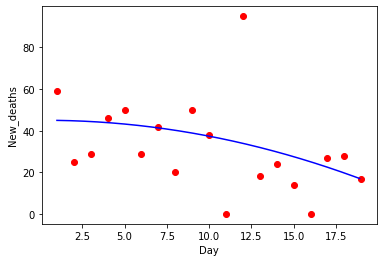

In [30]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,Y, color='red') 
plt.plot(X_grid, poly_regression1.predict(X_grid),color='blue')
plt.xlabel('Day')
plt.ylabel('New_deaths')
plt.show()

In [31]:
#prediction of new_cases on 20 November 2021
int(poly_regression1.predict([[20]]))

13

In [32]:
#prediction of new_cases on 21 November 2021
int(poly_regression1.predict([[21]]))

10

## 1.2  Considering the available data for 2021, what is the predicted average number of New_deaths for the whole of Africa for November 20, 2021 and November 21, 2021?


In [33]:
# Extracting Africa from other WHO_region
Africa=data[data['WHO_region']=="AFRO"]
Africa

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
1374,2020-01-03,Algeria,AFRO,0,0,0,0,2020,1,3
1375,2020-01-04,Algeria,AFRO,0,0,0,0,2020,1,4
1376,2020-01-05,Algeria,AFRO,0,0,0,0,2020,1,5
1377,2020-01-06,Algeria,AFRO,0,0,0,0,2020,1,6
1378,2020-01-07,Algeria,AFRO,0,0,0,0,2020,1,7
...,...,...,...,...,...,...,...,...,...,...
162814,2021-11-15,Zimbabwe,AFRO,10,133438,1,4697,2021,11,15
162815,2021-11-16,Zimbabwe,AFRO,33,133471,0,4697,2021,11,16
162816,2021-11-17,Zimbabwe,AFRO,34,133505,1,4698,2021,11,17
162817,2021-11-18,Zimbabwe,AFRO,52,133557,1,4699,2021,11,18


In [34]:
Africa.isnull().sum()

Date_reported        0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
Year                 0
Month                0
Day                  0
dtype: int64

In [35]:
# Extracting November 2021 to be used in prediction of new deaths on 20 and 21 November
AfricaData=Africa[(Africa['Year']==2021)&(Africa['Month']==11)]
AfricaData

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
2042,2021-11-01,Algeria,AFRO,94,206452,2,5920,2021,11,1
2043,2021-11-02,Algeria,AFRO,114,206566,4,5924,2021,11,2
2044,2021-11-03,Algeria,AFRO,83,206649,3,5927,2021,11,3
2045,2021-11-04,Algeria,AFRO,105,206754,4,5931,2021,11,4
2046,2021-11-05,Algeria,AFRO,124,206878,5,5936,2021,11,5
...,...,...,...,...,...,...,...,...,...,...
162814,2021-11-15,Zimbabwe,AFRO,10,133438,1,4697,2021,11,15
162815,2021-11-16,Zimbabwe,AFRO,33,133471,0,4697,2021,11,16
162816,2021-11-17,Zimbabwe,AFRO,34,133505,1,4698,2021,11,17
162817,2021-11-18,Zimbabwe,AFRO,52,133557,1,4699,2021,11,18


In [36]:
AfricaData.shape

(950, 10)

In [37]:
 # sorting by day
AfricaData= AfricaData.sort_values(by='Day')
AfricaData

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
2042,2021-11-01,Algeria,AFRO,94,206452,2,5920,2021,11,1
92039,2021-11-01,Mayotte,AFRO,0,20555,0,185,2021,11,1
44636,2021-11-01,Eritrea,AFRO,18,6834,0,45,2021,11,1
23339,2021-11-01,Burundi,AFRO,0,20078,0,14,2021,11,1
132572,2021-11-01,Sierra Leone,AFRO,0,6398,0,121,2021,11,1
...,...,...,...,...,...,...,...,...,...,...
85874,2021-11-19,Malawi,AFRO,4,61858,1,2303,2021,11,19
85187,2021-11-19,Madagascar,AFRO,0,43672,0,964,2021,11,19
81752,2021-11-19,Liberia,AFRO,0,5818,0,287,2021,11,19
103736,2021-11-19,Niger,AFRO,23,6773,1,237,2021,11,19


In [38]:
# finding the average by each day in all cases
AfricaData= AfricaData.groupby('Day').mean()
AfricaData=AfricaData.reset_index()
AfricaData

,Day,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month
0,1,21.56,123044.76,0.82,3013.04,2021.0,11.0
1,2,38.92,123083.68,1.04,3014.08,2021.0,11.0
2,3,82.16,123165.84,2.42,3016.50,2021.0,11.0
3,4,51.74,123217.58,1.68,3018.18,2021.0,11.0
4,5,147.90,123365.48,1.60,3019.78,2021.0,11.0
5,6,35.86,123401.34,1.68,3021.46,2021.0,11.0
6,7,32.18,123433.52,1.36,3022.82,2021.0,11.0
7,8,22.62,123456.14,1.12,3023.94,2021.0,11.0
8,9,39.32,123495.46,1.74,3025.68,2021.0,11.0
9,10,74.90,123570.36,2.36,3028.04,2021.0,11.0


In [39]:
# visualising polynomial regression
X=AfricaData["Day"].values.reshape(-1,1)
Y=AfricaData["New_deaths"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [40]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

poly_regression.fit(X_train, y_train)
y_predict = poly_regression.predict(X_test)

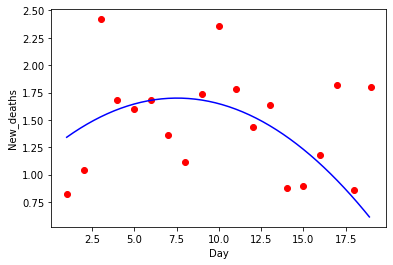

In [41]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,Y, color='red') 
plt.plot(X_grid, poly_regression.predict(X_grid),color='blue')
plt.xlabel('Day')
plt.ylabel('New_deaths')
plt.show()

In [42]:
#prediction average of new_deaths on 20 November 2021
int(poly_regression.predict([[20]]))

0

In [45]:
#prediction average of new_deaths on 21 November 2021
int(poly_regression.predict([[21]]))


0